In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

Text(0.5,1,'TEC Map')

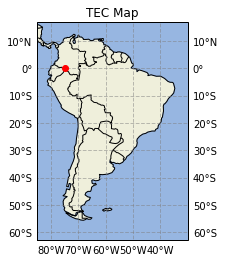

In [4]:
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
ax.set_extent([-85, -30, -60, 15])
plt.plot(-75, 0.0,'ro')

gl = ax.gridlines(crs=proj, draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


plt.title('TEC Map')

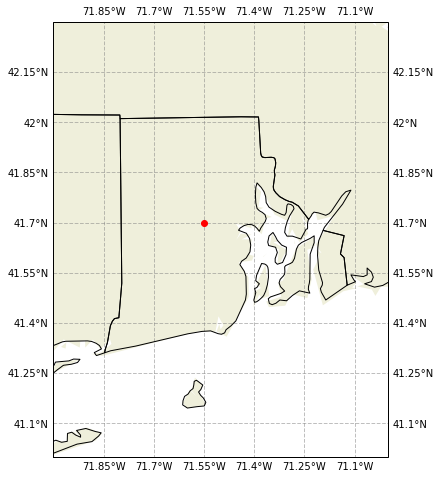

In [85]:
proj = ccrs.PlateCarree()
plt.figure(figsize=(8,8))
ax = plt.axes(projection=proj)
coast = cartopy.feature.GSHHSFeature(scale='intermediate',
                                     edgecolor='None',
                                     facecolor=cfeature.COLORS['land'])
state = cartopy.feature.NaturalEarthFeature(category='cultural', 
                                            scale='10m', 
                                            edgecolor='black',
                                            facecolor='none',
                                            name='admin_1_states_provinces_shp')

ax.add_feature(coast)
ax.add_feature(state, zorder=11)

ax.set_extent([-72, -71, 41.0, 42.3])
plt.plot(-75, 0.0,'ro')

gl = ax.gridlines(crs=proj, draw_labels=True,
                  linewidth=1, color='gray', 
                  alpha=0.5, 
                  linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plt.plot(-71.55, 41.70,'ro')


In [89]:
from netCDF4 import Dataset

In [90]:
ds = Dataset('etopo1.grd')

In [106]:
dx,dy = ds.variables['spacing'][:]
nx,ny = ds.variables['dimension'][:]
x0,x1 = ds.variables['x_range'][:]
y0,y1 = ds.variables['y_range'][:]

In [111]:
x = np.linspace(x0,x1,nx)
y = np.linspace(y0,y1,ny)

In [128]:
z = ds.variables['z'][:].reshape(ny,nx,order='C')

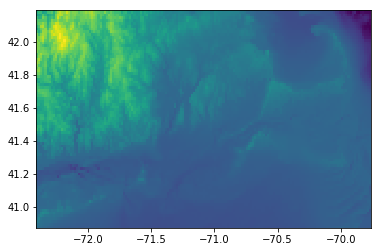

In [136]:
plt.pcolor(x,y,z[::-1,:])

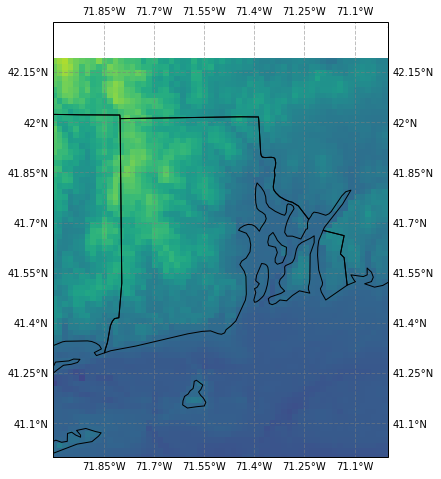

In [140]:
proj = ccrs.PlateCarree()
plt.figure(figsize=(8,8))
ax = plt.axes(projection=proj)
ax.pcolor(x,y,z[::-1,:])
gl = ax.gridlines(crs=proj, draw_labels=True,
                  linewidth=1, color='gray', 
                  alpha=0.5, 
                  linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
coast = cartopy.feature.GSHHSFeature(scale='intermediate',
                                     edgecolor='None',
                                     facecolor='None')
state = cartopy.feature.NaturalEarthFeature(category='cultural', 
                                            scale='10m', 
                                            edgecolor='black',
                                            facecolor='none',
                                            name='admin_1_states_provinces_shp')

ax.add_feature(coast)
ax.add_feature(state, zorder=11)

ax.set_extent([-72, -71, 41.0, 42.3])